In [ ]:
# Start with loading all necessary librariesimport pandas as pd
import re
import nltk
import heapq
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
### load stopwords 
nltk.download('stopwords')

In [2]:

def wordcloud(text):
    '''Word cloud'''
    wordcloud = WordCloud(max_font_size=1000, max_words=100, background_color="white").generate(str(text))
    plt.figure()
    plt.imshow(wordcloud, interpolation= 'bilinear')
    plt.axis("off")
    plt.show()

In [3]:
def clean_text(text):
    '''Clean the text with special characters, extra spaces etc..'''
    clean_abstract = []
    clean_abstract = re.sub(r'\d',' ',text)
    clean_abstract = re.sub(r'\W', ' ',clean_abstract)    
    clean_abstract = re.sub(r'\s+', ' ',text)
    text = re.sub(r'\[[0-9]*\]',' ',text)
    return text


In [4]:
### Remove stopwords from text 
def tokenise_text(text):
    '''remove stop words, tokenize the text and create word count with scores'''
    wordcnt = {}
    for word in nltk.word_tokenize(text):
        if word not in stopwords_custom:
            if word not in wordcnt.keys():
                wordcnt[word] = 1
            else:
                wordcnt[word] += 1
    ## Tokenize the text 
    sentenses = nltk.sent_tokenize(text)
    for key in wordcnt.keys():
        wordcnt[key] = wordcnt[key]/max(wordcnt.values())
    return wordcnt,sentenses

In [5]:
### fix the number of words per sentence on summarized text and generate sentence score 
def summrize_text(wordcnt,sentenses):
    '''summarize the text!! choose desired number of words in sentence and number of sentense'''
    sent_score = {}
    for sentense in sentenses:
        for word in nltk.word_tokenize(sentense.lower()):
            if word in wordcnt.keys():
                if len(sentense.split(' ')) < 25:
                    if sentense not in sent_score.keys():
                        sent_score[sentense] = wordcnt[word]
                    else:
                        sent_score[sentense] += wordcnt[word]
    
    ### Pick best sentence for summarized text 
    best_sent = heapq.nlargest(2,sent_score,key = sent_score.get)
                
    return best_sent

In [6]:
### read the file
df_text = pd.read_csv('covid.csv')

In [7]:
stopwords_custom = nltk.corpus.stopwords.words('english')

customize_stop_words = ['common','review','describes','abstract','retrospective','chart','patients','study','may','associated','results','including','high'
                        'found','one','well','among','Abstract','provide','objective','objective:','background','range','features','participates',''
    'doi', 'preprint', 'copyright', 'org', 'https', 'et ','et' 'al', 'author', 'figure', 'table',
    'rights', 'reserved', 'permission', 'use', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 'al.', 'Elsevier', 'PMC', 'CZI',
  
]


In [8]:
### append custom stopwords to default stopwords from NLTK
for i in customize_stop_words:
    stopwords_custom.append(i)

In [9]:
## check for null values in the file
df_text.isnull().sum()

Unnamed: 0         0
paper_id           0
title              0
abstract        7979
publish_time       0
authors            0
year               0
refid              0
nbQuotations       0
references         0
dtype: int64

In [10]:
### Abstract has nulls. Since it is important to have data in absrtact, removing records with nulls in this field
df_text.dropna(subset=['abstract'],inplace = True)

In [11]:
### convert abstract to all lower before removing stopwords
df_text['abstract'] = df_text['abstract'].str.lower()

In [12]:
### remove stopwords from abstract, create new feature. 
df_text['abstract_wo_stop_words']  = df_text['abstract'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_custom)]))

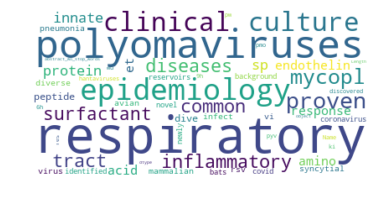

In [13]:
### lets see what are the words that are frequently used in all 50K+ papers from the dataset
wordcloud(df_text['abstract_wo_stop_words'])

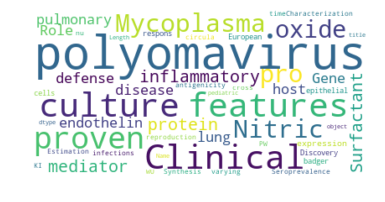

In [14]:
### most commonly used words in title in entire corpus of data 
wordcloud(df_text['title'])

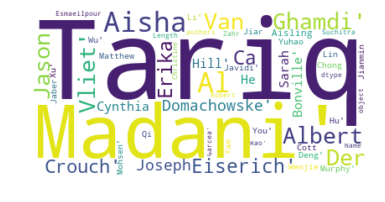

In [15]:
# authors with more publications
wordcloud(df_text['authors'])

In [16]:
### as we can see, paper publised year as one of the variable in dataset. lets see what is oldest and latest published years.
print('oldest paper published year:',df_text['year'].min())
print('recent published year: ' ,df_text['year'].max())


oldest paper published year: 1955
recent published year:  2021


In [17]:
### find the paper with publication year 2021
df_text[df_text['year'] == 2021]
### looks publish time for this year is wrongly entered as the paper originally published in April 2020!!

,Unnamed: 0,paper_id,title,abstract,publish_time,authors,year,refid,nbQuotations,references,abstract_wo_stop_words
45927,45927,224fba9bf09ca0e8abd730f44da3b6808cf632f5,21 Respiratory viruses,abstract: respiratory viruses are commonly det...,2021-12-31,"['Alpana Waghmare', 'Janet Englund']",2021,3bc7876919bb4d2a1ff0de7dcdd26026666147d3,0.0,"['0b0ace3ad8a2fd1c3f796d3dcd87a917bff7b9dc', '...",abstract: respiratory viruses commonly detecte...


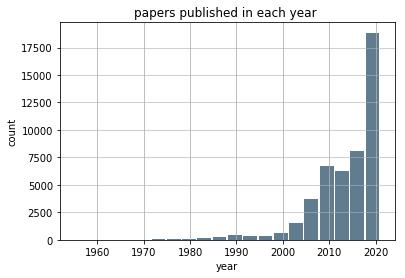

In [18]:
### distribution of publication year
size, scale = 1000, 10
df_text['year']

df_text['year'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('papers published in each year ')
plt.xlabel('year')
plt.ylabel('count')
plt.grid(axis='y', alpha=0.75)

In [19]:
df_text.reset_index(inplace = True)

In [28]:
### select any text from abstract for summarization'

text= str(df_text['abstract'][9999])
#text= str(df_text['abstract'][999])


In [29]:
text = clean_text(text)

In [30]:
print(wordcloud.__doc__)

Word cloud


In [31]:
text

'background: oropharyngeal colostrum (oc) is a novel feeding strategy to prevent complications of prematurity. a meta-analysis was conducted to investigate whether very low birth weight infants (vlbws) can benefit from oc. methods: randomized controlled trials (rcts) were searched from embase, pubmed, web of science, and cochrane central register of controlled trials from the date of inception until may 2019. rcts were eligible if they used oc therapy on vlbw infants. the primary outcomes included ventilator-associated pneumonia (vap), necrotizing enterocolitis (nec), bronchopulmonary dysplasia (bpd), late-onset sepsis, and death. the secondary outcomes included the time of full enteral feeding and the length of stay. results: eight rcts involving 682 patients (oc group: 332; non-oc group: 350) were included in the meta-analysis. the results suggested that oc was associated with a significantly reduced incidence of vap [odds ratio (or) = 0.39, 95% confidence interval (ci): 0.17–0.88, p

In [32]:
wordcnt,sentenses = tokenise_text(text)

In [33]:
best_sent = summrize_text(wordcnt,sentenses)

In [34]:
### print final summarized text for the one of the absrtact for covid-19 list of publications dataset.
for sentense in best_sent:
    print(sentense)

conclusions: oc could significantly reduce the occurrence of vap, and consequently, its routine use should be considered for vlbws to prevent infectious diseases.
the primary outcomes included ventilator-associated pneumonia (vap), necrotizing enterocolitis (nec), bronchopulmonary dysplasia (bpd), late-onset sepsis, and death.
